# LAB 2 


## A- MÉMORISATION DE FORMES SIMPLES


### Apprentissage incrémental

#### Question 1

On définit les variables `V1`, `V2` et `V3` :

In [1]:
V1 = [1, 1, 1, -1, 1, -1, -1, 1, -1]
V2 = [1, -1, -1, 1, -1, -1, 1, 1, 1]
V3 = [1, 1, 1, 1, -1, -1, 1, 1, 1]  

### Question 2

On définit une fonction pour calculer les poids du réseau selon la règle de Hebb :

In [2]:
import numpy as np

def calculate_hebb_weights(vectors_to_learn):
    # Récupération de la dimension du premier vecteur
    n = len(vectors_to_learn[0])
    
    # Initialisation de la matrice de poids W à zéros
    W = np.zeros((n, n))
    
    # Application de la règle de Hebb
    for v in vectors_to_learn:
        W += np.outer(v, v)
        
    # Mise de la diagonale à 0 (car un neurone n'est pas connecté à lui-même)
    np.fill_diagonal(W, 0)
    
    return W

On calcule les poids du réseau pour mémoriser les formes `V1` et `V2` selon la règle de Hebb :

In [3]:
W = calculate_hebb_weights([np.array(V1), np.array(V2)])
print("Matrice des poids W:")
print(W)

Matrice des poids W:
[[ 0.  0.  0.  0.  0. -2.  0.  2.  0.]
 [ 0.  0.  2. -2.  2.  0. -2.  0. -2.]
 [ 0.  2.  0. -2.  2.  0. -2.  0. -2.]
 [ 0. -2. -2.  0. -2.  0.  2.  0.  2.]
 [ 0.  2.  2. -2.  0.  0. -2.  0. -2.]
 [-2.  0.  0.  0.  0.  0.  0. -2.  0.]
 [ 0. -2. -2.  2. -2.  0.  0.  0.  2.]
 [ 2.  0.  0.  0.  0. -2.  0.  0.  0.]
 [ 0. -2. -2.  2. -2.  0.  2.  0.  0.]]


#### Question 3

On récupère la fonction `my_hopfield` :

In [4]:
import matplotlib.pyplot as plt
import time
from IPython import display

xsize = 3
ysize = 3
n_iter = 10

def my_hopfield(w,v,n_iter,xsize,ysize,verbose):
 # INPUTS:
 # w:   Matrice des poids.
 # v:   Vecteur en entrée de dim 1xN.  
 # n_iter:   nombre d'iterations maximal pour arreter l'évolution du réseau.  
 # xsize,ysize:  les dimensions de la carte (#lignes,#colonnes).  
 # verbose == 1  pour afficher l'évolution du réseau sinon 0 .  
 #    
 # OUTPUTS:
 # out, energy=my_hopfield(w,v,n_iter,xsize,ysize,verbose)
 # out:   output apres n_iter(iterations) 
 # energy:   energy à chaque iteration 
    fig,axarr = plt.subplots(2,1,figsize=(3,3))
    hdisplay = display.display("Réseau Hopfield", display_id=True)

    energy=np.array([])
    energy=np.append(energy,-0.5*v @ w @ v.transpose())    
    visitee=np.array([])
    epoch=0
    txt = "Evolution du réseau..itération No={},Energy={}"
    txt=txt.format(epoch,energy[epoch])
    mycarte(v,axarr[0],txt,hdisplay=hdisplay)
    hdisplay.update(fig)
    while(epoch<n_iter*v.shape[1]):
        net=v@w
        net[net>0]=1
        net[net<0]=-1
        out=net
        idx=(v!=out)*1
        idx=np.where(idx == 1)[1]

        if(idx.size == 0):
            break

        search=1

        while(search):
            update = np.random.randint(0, len(idx), 1)[0]
            if(np.intersect1d(idx[update], visitee).size==0):
                v[0,idx[update]] = -v[0,idx[update]] 
                energy=np.append(energy,-0.5*v @ w @ v.transpose())
                visitee=np.append(visitee,idx[update])
                search=0
                if(verbose==1):              
                    idxpt = np.unravel_index(idx[update], (xsize,ysize))
                    axarr[1].scatter(idxpt[1], idxpt[0], marker="x", color="red", s=100)
                    txt = "Evolution du réseau..itération No={},Energy={}"
                    mycarte(v,axarr[1],txt.format(epoch,energy[epoch]),hdisplay=hdisplay)
                    axarr[1].scatter(idxpt[1], idxpt[0], marker="x", color="white", s=100)
                    hdisplay.update(fig)
                    time.sleep(1)
                idx=np.delete(idx, update)              
            else:
                idx=np.delete(idx, update)
            if(idx.size==0):
                search=0
        epoch=epoch+1
    txt = "Evolution du réseau..itération No={},Energy={}"
    mycarte(v,axarr[1],txt.format(epoch,energy[epoch]),hdisplay=hdisplay)
    time.sleep(1)
    hdisplay.update(fig)
    plt.close(fig)
    out=v
    return out,energy


#%% fonction mycarte
#%% une fonction interne pour afficher l'état du réseau sous forme de matrice binaire
def mycarte(vect,ax,titre,hdisplay):
    vect=vect.reshape((xsize,ysize))
    ax.imshow(np.where(vect>=0,1,0),origin='upper',cmap="Greys",interpolation='nearest')
    ax.imshow(np.where(vect>=0,1,0),origin='upper',cmap="Greys",interpolation='nearest')
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)
    ax.set_title(titre, fontsize=9,color='blue')

On vérifie à présent la matrice de poids en injectant dans le réseau les formes mémorisées `V1` et `V2` avec les fonctions définies précédemment :

--- Test de V1 ---


'Réseau Hopfield'

Entrée V1: [[ 1  1  1 -1  1 -1 -1  1 -1]]
Sortie V1: [[ 1  1  1 -1  1 -1 -1  1 -1]]
Résultat: V1 est stable. Mémorisation réussie.

--- Test de V2 ---


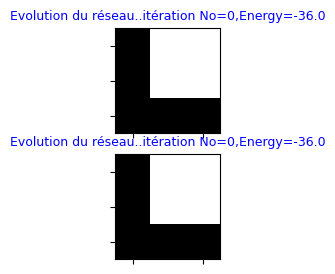

Entrée V2: [[ 1 -1 -1  1 -1 -1  1  1  1]]
Sortie V2: [[ 1 -1 -1  1 -1 -1  1  1  1]]
Résultat: V2 est stable. Mémorisation réussie.


In [5]:
V1_2d = np.array(V1).reshape(1, -1)
V2_2d = np.array(V2).reshape(1, -1)

print("--- Test de V1 ---")
out_v1, energy_v1 = my_hopfield(W, V1_2d.copy(), n_iter, xsize, ysize, 1)

print("Entrée V1:", V1_2d)
print("Sortie V1:", out_v1)
if np.array_equal(out_v1, V1_2d):
    print("Résultat: V1 est stable. Mémorisation réussie.")
else:
    print("Résultat: V1 N'EST PAS stable.")

print("\n--- Test de V2 ---")
out_v2, energy_v2 = my_hopfield(W, V2_2d.copy(), n_iter, xsize, ysize, 1)

print("Entrée V2:", V2_2d)
print("Sortie V2:", out_v2)
if np.array_equal(out_v2, V2_2d):
    print("Résultat: V2 est stable. Mémorisation réussie.")
else:
    print("Résultat: V2 N'EST PAS stable.")

#### Question 4

On injecte la forme `V3` qui n' a pas encore été mémorisée :

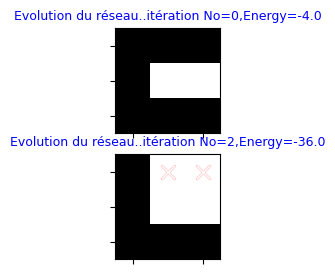


Entrée V3 (non mémorisée): [[ 1  1  1  1 -1 -1  1  1  1]]
Sortie du réseau: [[ 1 -1 -1  1 -1 -1  1  1  1]]

--- Analyse de la sortie ---
Résultat: Le réseau a convergé vers V2.


In [6]:
V3_2d = np.array(V3).reshape(1, -1)

# On injecte V3_2d.copy() dans le réseau qui ne connaît que V1 et V2
out_v3, energy_v3 = my_hopfield(W, V3_2d.copy(), n_iter, xsize, ysize, 1)

print("\nEntrée V3 (non mémorisée):", V3_2d)
print("Sortie du réseau:", out_v3)

# Analyse du résultat
print("\n--- Analyse de la sortie ---")
if np.array_equal(out_v3, V1_2d):
    print("Résultat: Le réseau a convergé vers V1.")
elif np.array_equal(out_v3, V2_2d):
    print("Résultat: Le réseau a convergé vers V2.")
elif np.array_equal(out_v3, V3_2d):
    print("Résultat: Le réseau a convergé vers V3.")
else:
    print("Résultat: Le réseau a convergé vers un autre état.")

Oui, ce résultat était prévisible. Le réseau de Hopfield est une mémoire auto-associative qui fait converger une entrée vers l'état stable (mémorisé) le plus proche.

La forme V3 (non mémorisée) a une distance de Hamming de 4 avec V1 mais de seulement 2 avec V2. Le réseau a donc "associé" l'entrée V3 à la forme mémorisée V2, la traitant comme une version bruitée de V2.

### Mémorisez la forme V3

#### Question 1

--- Nouvelle matrice W_123 (V1+V2+V3) calculée ---
[[ 0.  1.  1.  1. -1. -3.  1.  3.  1.]
 [ 1.  0.  3. -1.  1. -1. -1.  1. -1.]
 [ 1.  3.  0. -1.  1. -1. -1.  1. -1.]
 [ 1. -1. -1.  0. -3. -1.  3.  1.  3.]
 [-1.  1.  1. -3.  0.  1. -3. -1. -3.]
 [-3. -1. -1. -1.  1.  0. -1. -3. -1.]
 [ 1. -1. -1.  3. -3. -1.  0.  1.  3.]
 [ 3.  1.  1.  1. -1. -3.  1.  0.  1.]
 [ 1. -1. -1.  3. -3. -1.  3.  1.  0.]]

--- Test de V3 (maintenant mémorisée) ---


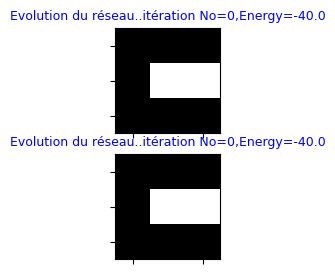

Entrée V3: [[ 1  1  1  1 -1 -1  1  1  1]]
Sortie V3 (nouvelle matrice): [[ 1  1  1  1 -1 -1  1  1  1]]
Résultat: V3 est maintenant stable. Mémorisation incrémentale réussie.


In [7]:
# On re-définit les vecteurs 1D pour le calcul
V1_1d = np.array(V1)
V2_1d = np.array(V2)
V3_1d = np.array(V3)

# Calcul de la matrice de poids pour V3
W_V3 = calculate_hebb_weights([V3_1d])

# Apprentissage incrémental 
W_123 = W + W_V3

print("--- Nouvelle matrice W_123 (V1+V2+V3) calculée ---")
print(W_123)

# Confirmation de la validité en réinjectant V3
print("\n--- Test de V3 (maintenant mémorisée) ---")

out_v3_new, energy_v3_new = my_hopfield(W_123, V3_2d.copy(), n_iter, xsize, ysize, 1)

print("Entrée V3:", V3_2d)
print("Sortie V3 (nouvelle matrice):", out_v3_new)

# Analyse
if np.array_equal(out_v3_new, V3_2d):
    print("Résultat: V3 est maintenant stable. Mémorisation incrémentale réussie.")
else:
    print("Résultat: Échec ! Le réseau a convergé vers un autre état.")

Il y a 0 itération et la sortie est parfaitement identique à l'entrée, ce qui confirme que `V3`  est devenu un nouvel état stable du résseau.

#### Question 2

--- Test de V3 (après désapprentissage) ---


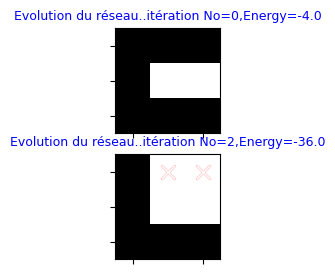

Entrée V3: [[ 1  1  1  1 -1 -1  1  1  1]]
Sortie du réseau (après désapprentissage): [[ 1 -1 -1  1 -1 -1  1  1  1]]
Résultat: Le réseau converge à nouveau vers V2. Désapprentissage réussi !

Vérification de la matrice :
La matrice W_12_desappris est identique à la matrice W originale (V1, V2).


In [8]:
# Désapprentissage en partant de W_123 qui connaît les 3 formes
W_12_desappris = W_123 - W_V3

# Confirmeation en réinjectant V3
print("--- Test de V3 (après désapprentissage) ---")

out_v3_des, energy_v3_des = my_hopfield(W_12_desappris, V3_2d.copy(), n_iter, xsize, ysize, 1)

print("Entrée V3:", V3_2d)
print("Sortie du réseau (après désapprentissage):", out_v3_des)

# --- Analyse ---
if np.array_equal(out_v3_des, V2_2d):
    print("Résultat: Le réseau converge à nouveau vers V2. Désapprentissage réussi !")
elif np.array_equal(out_v3_des, V3_2d):
    print("Résultat: Échec ! V3 est toujours un état stable.")
else:
    print("Résultat: Le réseau a convergé vers un autre état.")

# Vérification que W_12_desappris est identique à la matrice W d'origine
print("\nVérification de la matrice :")
if np.array_equal(W, W_12_desappris):
    print("La matrice W_12_desappris est identique à la matrice W originale (V1, V2).")
else:
    print("Les matrices ne sont pas identiques.")

#### Question 3

L'apprentissage incrémental présente deux principaux avantages par rapport aux autres formes d'apprentissage :
- Efficacité (vitesse) : C'est l'avantage principal. Pour ajouter une forme, il suffit de calculer le produit extérieur de la nouvelle forme (O(N2)) et de l'ajouter à la matrice W existante. "L'autre forme d'apprentissage" (l'apprentissage batch) consisterait à recalculer toute la matrice W depuis le début avec tous les vecteurs (V1, V2, et V3), ce qui serait beaucoup plus long, surtout si le réseau a déjà mémorisé des milliers de formes.
- Adaptabilité (Flexibilité) : Le réseau peut apprendre (ou désapprendre) de nouvelles informations "à la volée" sans avoir besoin de revoir toutes les données qu'il a déjà apprises. Il n'a pas besoin de garder en mémoire les formes V1 et V2 pour apprendre V3 ; il n'a besoin que de la matrice W actuelle et de la nouvelle forme V3.

### États stables

#### Question 1

Injection de la forme X dans le réseau W_123 (V1, V2, V3)...
Forme X: [[ 1 -1  1  1 -1 -1  1  1  1]]
------------------------------
Essai 1:


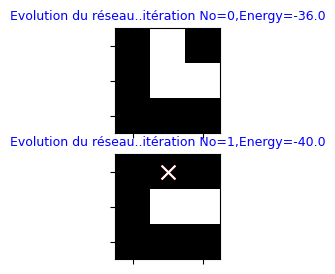

Sortie de l'essai 1: [[ 1  1  1  1 -1 -1  1  1  1]]
Résultat: Le réseau a convergé vers V3.

Essai 2:


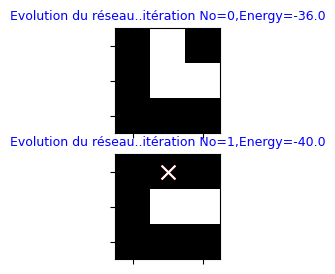

Sortie de l'essai 2: [[ 1  1  1  1 -1 -1  1  1  1]]
Résultat: Le réseau a convergé vers V3.

Essai 3:


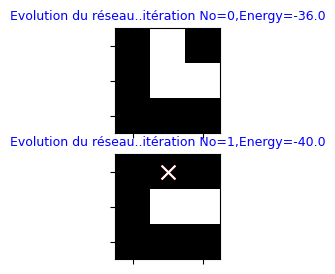

Sortie de l'essai 3: [[ 1  1  1  1 -1 -1  1  1  1]]
Résultat: Le réseau a convergé vers V3.



In [9]:
# Définition de la forme X
X_list = [1, -1, 1, 1, -1, -1, 1, 1, 1]
X_2d = np.array([X_list])

print("Injection de la forme X dans le réseau W_123 (V1, V2, V3)...")
print("Forme X:", X_2d)
print("-" * 30)

# On réalise quelques essais
for i in range(3):
    print(f"Essai {i+1}:")
    out_X, energy_X = my_hopfield(W_123, X_2d.copy(), n_iter, xsize, ysize, 1)
    
    print(f"Sortie de l'essai {i+1}:", out_X)
    
    # Analyse de la sortie
    if np.array_equal(out_X, V1_2d):
        print("Résultat: Le réseau a convergé vers V1.\n")
    elif np.array_equal(out_X, V2_2d):
        print("Résultat: Le réseau a convergé vers V2.\n")
    elif np.array_equal(out_X, V3_2d):
        print("Résultat: Le réseau a convergé vers V3.\n")
    else:
        print("Résultat: Le réseau a convergé vers un autre état (inconnu ou parasite).\n")

Le résultat peut être différent d'une fois à l'autre à cause du mode de mise à jour asynchrone et aléatoire utilisé par la fonction `my_hopfield`. En effet, plutôt que de calculer l'état de tous les neurones et de les mettre à jour tous en même temps (mode synchrone), cette fonction identifie d'abord tous les neurones "instables" (ceux qui veulent changer d'état). Ensuite, elle en choisit un au hasard dans cette liste pour le mettre à jour. Enfin, une forme d'entrée (comme X) peut être "à mi-chemin" entre deux ou plusieurs états mémorisés (`V1`, `V2`, ou `V3`). Le tout premier neurone qui bascule (choisi au hasard) peut faire "pencher la balance" et entraîner le réseau dans un "bassin d'attraction" différent.

#### Question 2

On écrit une fonction qui calcule la distance de Hamming entre deux vecteurs binaires :

In [10]:
def hd(v1, v2):
    v1_arr = np.array(v1).flatten()
    v2_arr = np.array(v2).flatten()
    return np.sum(v1_arr != v2_arr)

Voici quelques exemples d'utilisation (pour vérifier l'analyse à la question 1) :

In [11]:
X_1d = np.array(X_list) 
V1_1d = np.array(V1)
V2_1d = np.array(V2)
V3_1d = np.array(V3)

print(f"Distance de Hamming entre X et V1: {hd(X_1d, V1_1d)}")
print(f"Distance de Hamming entre X et V2: {hd(X_1d, V2_1d)}")
print(f"Distance de Hamming entre X et V3: {hd(X_1d, V3_1d)}")

Distance de Hamming entre X et V1: 5
Distance de Hamming entre X et V2: 1
Distance de Hamming entre X et V3: 1


#### Question 3

In [12]:
# Définition de la forme Y
Y_list = [-1, -1, -1, 1, 1, 1, -1, -1, -1]
Y_1d = np.array(Y_list)

# Utilisation de la fonction hd() pour calculer les distances
dist_Y_V1 = hd(Y_1d, V1_1d)
dist_Y_V2 = hd(Y_1d, V2_1d)
dist_Y_V3 = hd(Y_1d, V3_1d)

print(f"Distance de Hamming entre Y et V1: {dist_Y_V1}")
print(f"Distance de Hamming entre Y et V2: {dist_Y_V2}")
print(f"Distance de Hamming entre Y et V3: {dist_Y_V3}")

Distance de Hamming entre Y et V1: 6
Distance de Hamming entre Y et V2: 6
Distance de Hamming entre Y et V3: 8


La forme `Y` est à égale distance des états stables `V1` et `V2`, et plus éloignée de `V3`. Par conséquent, le réseau devrait converger soit vers `V1` soit vers `V2`. Le résultat final dépendra de l'ordre aléatiore dans lequel les neurones instables seront mis à jour.

#### Question 4

On injecte `Y` dans le réseau `W0` afin de verifier notre résultat avec `my_hopfield()` :

--- Test de Y (non mémorisée) ---
Entrée Y: [[-1 -1 -1  1  1  1 -1 -1 -1]]
------------------------------
Essai 1:


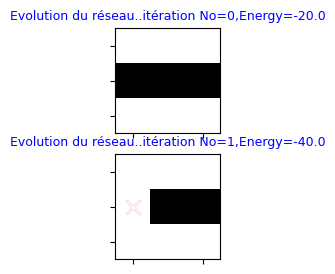

Sortie de l'essai 1: [[-1 -1 -1 -1  1  1 -1 -1 -1]]
Résultat: Le réseau a convergé vers un autre état.

Essai 2:


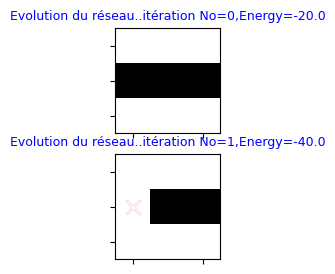

Sortie de l'essai 2: [[-1 -1 -1 -1  1  1 -1 -1 -1]]
Résultat: Le réseau a convergé vers un autre état.

Essai 3:


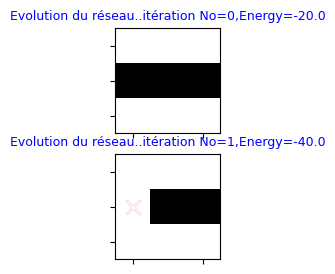

Sortie de l'essai 3: [[-1 -1 -1 -1  1  1 -1 -1 -1]]
Résultat: Le réseau a convergé vers un autre état.



In [13]:
# On prépare la forme Y en 2D (1,9) pour la fonction my_hopfield
Y_2d = np.array([Y_list])

print("--- Test de Y (non mémorisée) ---")
print("Entrée Y:", Y_2d)
print("-" * 30)

# On réalise quelques essais pour vérifier la prédiction
for i in range(3):
    print(f"Essai {i+1}:")
    out_Y, energy_Y = my_hopfield(W_123, Y_2d.copy(), n_iter, xsize, ysize, 1)
    
    print(f"Sortie de l'essai {i+1}:", out_Y)
    
    # Analyse de la sortie
    if np.array_equal(out_Y, V1_2d):
        print("Résultat: Le réseau a convergé vers V1. Prédiction confirmée.\n")
    elif np.array_equal(out_Y, V2_2d):
        print("Résultat: Le réseau a convergé vers V2. Prédiction confirmée.\n")
    elif np.array_equal(out_Y, V3_2d):
        print("Résultat: Le réseau a convergé vers V3 (Inattendu).\n")
    else:
        print("Résultat: Le réseau a convergé vers un autre état.\n")

La forme `Y` est sur une "ligne de crête" énergétique, à égale distance entre les "vallées" (bassins d'attraction) de `V1` et `V2`.

Au lieu de "tomber" d'un côté ou de l'autre, le processus de mise à jour aléatoire a fait converger le réseau vers une troisième "cuvette" plus petite, qui n'avait pas été mémorisée.

C'est en fait un état parasite (ou état stable parasite).

#### Question 5

On calcule la matrice de poids pour mémoriser `V1`, `V2` et le complément de `V3` :

Forme V1: [ 1  1  1 -1  1 -1 -1  1 -1]
Forme V2: [ 1 -1 -1  1 -1 -1  1  1  1]
Forme V3 Complément: [-1 -1 -1 -1  1  1 -1 -1 -1]

--- Nouvelle matrice W_12_3comp (V1, V2, V3_comp) calculée ---

--- Prédiction pour Y ---
Distance de Hamming (Y, V1) = 6
Distance de Hamming (Y, V2) = 6
Distance de Hamming (Y, V3_comp) = 1

--- Test de Y sur la nouvelle matrice ---
Entrée Y: [[-1 -1 -1  1  1  1 -1 -1 -1]]


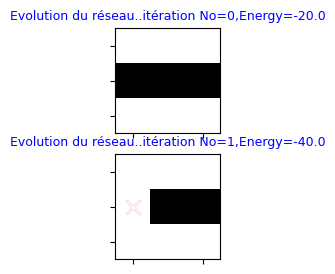


Sortie du réseau: [[-1 -1 -1 -1  1  1 -1 -1 -1]]

--- Analyse et Comparaison ---
Résultat: Le réseau a convergé vers V3_comp. Prédiction confirmée.


In [15]:
# Calcul du complément de V3
V3_comp_1d = -V3_1d
V3_comp_2d = np.array([V3_comp_1d]) # Version 2D pour my_hopfield

print("Forme V1:", V1_1d)
print("Forme V2:", V2_1d)
print("Forme V3 Complément:", V3_comp_1d)

# Calcul de la nouvelle matrice de poids
W_12_3comp = calculate_hebb_weights([V1_1d, V2_1d, V3_comp_1d])
print("\n--- Nouvelle matrice W_12_3comp (V1, V2, V3_comp) calculée ---")

# Prédiction de la convergence de Y
print("\n--- Prédiction pour Y ---")
dist_Y_V1 = hd(Y_1d, V1_1d)
dist_Y_V2 = hd(Y_1d, V2_1d)
dist_Y_V3comp = hd(Y_1d, V3_comp_1d)

print(f"Distance de Hamming (Y, V1) = {dist_Y_V1}")
print(f"Distance de Hamming (Y, V2) = {dist_Y_V2}")
print(f"Distance de Hamming (Y, V3_comp) = {dist_Y_V3comp}")

# Vérification de la convergence de Y
print("\n--- Test de Y sur la nouvelle matrice ---")
print("Entrée Y:", Y_2d)

out_Y_new, energy_Y_new = my_hopfield(W_12_3comp, Y_2d.copy(), n_iter, xsize, ysize, 1)

print("\nSortie du réseau:", out_Y_new)

# Comparaison avec la question 4
print("\n--- Analyse et Comparaison ---")
if np.array_equal(out_Y_new, V3_comp_2d):
    print("Résultat: Le réseau a convergé vers V3_comp. Prédiction confirmée.")
else:
    print("Résultat: Le réseau n'a PAS convergé vers V3_comp.")

À la question 4, `Y` convergeait vers un état parasite. En mémorisant le complément de `V3`, nous avons modifié le "paysage énergétique" du réseau. L'entrée `Y`, qui se trouvait auparavant dans un minimum local (état parasite), est maintenant très proche (distance 1) du nouvel état stable `V3_comp` et y converge.

### États parasites

#### Question 4